<a href="https://colab.research.google.com/github/ebruakyuz/AI-Bootcamp/blob/master/GenAI_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About This Demo

by eebru@ggogle.com


Leveraging GenAI in Marketing Analytics


A retail customer is interested in improving their prodyct description in their website through GenAI, in order to increase their SEO visibility and pageviews to their product detail pages. Thisincrease is expected to their sales revenue.
Customer is also looking an automated way to create a social post for each product to apmlify the visit to teir website and sales.


## Authorization

In [1]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

## Install Vertex LLM Preview SDK



In [2]:
!pip install google-cloud-aiplatform --upgrade --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


#### ! ^^^^ Do not forget to click the "Restart runtime" button above.

## Set project ID

In [10]:
PROJECT_ID = "cloud-llm-preview4" # @param {type:"string"}
LOCATION = "us-central1" # @param {type:"string"}

from google.cloud import aiplatform
aiplatform.init(project=PROJECT_ID, location=LOCATION)

## Input Preparation for Prompt

Public Data set used: Amazon Product Data 2020 [marketing sample for amazon com ecommerce]

Refer: https://www.kaggle.com/datasets/promptcloud/amazon-product-dataset-2020?resource=download


In [15]:
!pip install --upgrade google-cloud-bigquery
from google.cloud import bigquery
import pandas as pd
import numpy as np
client = bigquery.Client(project=PROJECT_ID)
query_job = client.query( """
    select name  from `bigquery-public-data.thelook_ecommerce.products`;
"""
)
results = query_job.result()
dataset=results.to_dataframe()
dataset.info()
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    29118 non-null  object
dtypes: object(1)
memory usage: 227.6+ KB


Index(['name'], dtype='object')

In [ ]:
#import pandas and numpy
import pandas as pd
import numpy as np

#load data set
dataset = pd.read_csv("Amazon_Product_Data_2020.csv")
#dataset.head(5)
#dataset.shape
dataset.info()
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

Index(['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

In [16]:
dataset.head(11)

,name
0,2XU Men's Swimmers Compression Long Sleeve Top
1,TYR Sport Men's Square Leg Short Swim Suit
2,TYR Sport Men's Solid Durafast Jammer Swim Suit
3,TYR Sport Men's Swim Short/Resistance Short Sw...
4,TYR Alliance Team Splice Jammer
5,TYR Sport Men's 4-Inch Nylon Trainer-A Swim Suit
6,TYR Sport Men's Solid Jammer Swim Suit
7,TYR Sport Men's Poly Mesh Trainer Swim Suit
8,TYR Sport Men's Alliance Durafast Splice Squar...
9,TYR Sport Men's Solid Racer Swim Suit


##Lets pick one product

In [17]:
prod = dataset.iloc[-1:]
prod.shape

(1, 1)

##Lets generate new Product Descriptions using LLM

In [49]:
##Create Product Description from product name and product details given in input dataset
from vertexai.preview.language_models import TextGenerationModel

product_description_dict = {}

def generate_prompt(name):
    prompt = f"""
      You are a marketing manager. Write product description for our product.
      Product detail: {name}.
      Write the description to imprve the SEO results in search. The tone of the description should be exciting for the customers and make them want to buy the product.
      Be creative and descriptive. You are an honest seller.
    """
    return prompt


def generate_product_description(prompt, temperature=.2):
    model = TextGenerationModel.from_pretrained("text-bison-32k")
    response = model.predict(
        prompt,
        temperature=temperature,
        max_output_tokens=256,
        top_k=40,
        top_p=.8,
    )
    print('\n',response.text,'\n')
    return response.text

for index, row in prod.iterrows():
  prompt = generate_prompt(row['name'])
  response_text = generate_product_description(prompt)
  product_description_dict[row['name']] = response_text



  Independent Trading Co. Deluxe Fleece Zip Hoodie: The Epitome of Warmth and Style

Are you looking for a hoodie that combines exceptional warmth with unparalleled style? Look no further than the Independent Trading Co. Deluxe Fleece Zip Hoodie. Crafted from premium-quality materials, this hoodie is designed to provide you with the ultimate comfort and coziness during chilly days.

The Independent Trading Co. Deluxe Fleece Zip Hoodie boasts a luxurious fleece lining that feels incredibly soft against your skin. The high-quality cotton blend fabric ensures superior warmth and durability, making this hoodie a staple in your winter wardrobe for seasons to come.

Designed with a classic zip-up front, this hoodie allows for easy layering and temperature regulation. The adjustable drawstring hood offers an extra layer of protection from the cold, keeping your head and ears warm. The ribbed cuffs and waistband provide a secure and comfortable fit, ensuring that the hoodie stays in place thr

## Image Generation Setup

In [34]:
#@title Image Generation Attributes { display-mode: "form" }
IMAGE_MODEL_NAME = "imagegeneration" # @param {type:"string"}
sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 1 #@param {type:"integer"}
endpointType = "Prod" #@param ["Prod", "Fishfood"]

# Lets try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = 2023 #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('endpointType', endpointType)
print('seed', seed)

sampleImageSize: 1024
sampleCount: 4
endpointType Prod
seed 2023


In [35]:
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
# print(gcloud_tokeninfo['email'])
# print(gcloud_token[0])

ACCESS_TOKEN = gcloud_token[0]

# Using the updated publisher endpoint, updated May '23
ENDPOINT_URL = f'projects/{PROJECT_ID}/locations/us-central1/publishers/google/models/{IMAGE_MODEL_NAME}'

# This endpoint below is from the Internal Fishfooding Guide: go/IG-fishfooding
FF_ENDPOINT_URL = 'projects/cloud-lvm-fishfooding/locations/us-central1/endpoints/6988653136307027968'

In [36]:
import requests
import json
import time

def image_gen_model(prompt, sampleImageSize, sampleCount, endpointType='Prod', seed=None):
  headers = {
      'Authorization': f'Bearer {ACCESS_TOKEN}',
      'Content-Type': 'application/json; charset=UTF-8'
  }
  if seed==None:
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount}}
  else:
    # Use & provide a seed, if possible, so that we can reproduce the results when needed.
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount, "seed": seed}}

  print(data)
  if endpointType=='Prod':
    # Prod usage
    response = requests.post(f'https://us-central1-aiplatform.googleapis.com/v1/{ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  else:
    # Autopush usage
    response = requests.post(f'https://us-central1-autopush-aiplatform.sandbox.googleapis.com/v1/{FF_ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  return response

# Generate Images Using the Product Description that are generated by LLM

In [37]:
#This is to display the generated images
from IPython import display
import base64

def display_images(predictions):
  scale = 0.3
  width = int(float(sampleImageSize)*scale)
  height = int(float(sampleImageSize)*scale)
  for index, key in enumerate(predictions):
    print(index)
    display.display(display.Image(base64.b64decode(predictions[index]['bytesBase64Encoded']), width = width, height = height))
    print()


{'instances': [{'prompt': "The Independent Trading Co Deluxe Fleece Zip Hoodie is the perfect hoodie for any occasion. It's made from a soft, plush fleece that will keep you warm and comfortable all day long. The hoodie features a front zip closure, two front pockets, and a kangaroo pocket for extra storage. It's also available in a variety of colors to suit your style.\n\nThis hoodie is perfect for layering, so you can wear it over a t-shirt or dress shirt. It's also great for running errands, going to the gym, or just hanging out. No matter what you're doing, the Independent Trading Co Deluxe Fleece Zip Hoodie will keep you looking and feeling your best.\n\nHere are some of the benefits of our product:\n\n* Soft, plush fleece keeps you warm and comfortable\n* Front zip closure, two front pockets, and a kangaroo pocket for extra storage\n* Available in a variety of colors to suit your style\n* Perfect for layering, running errands, going to the gym, or just hanging out\n\nOrder your I

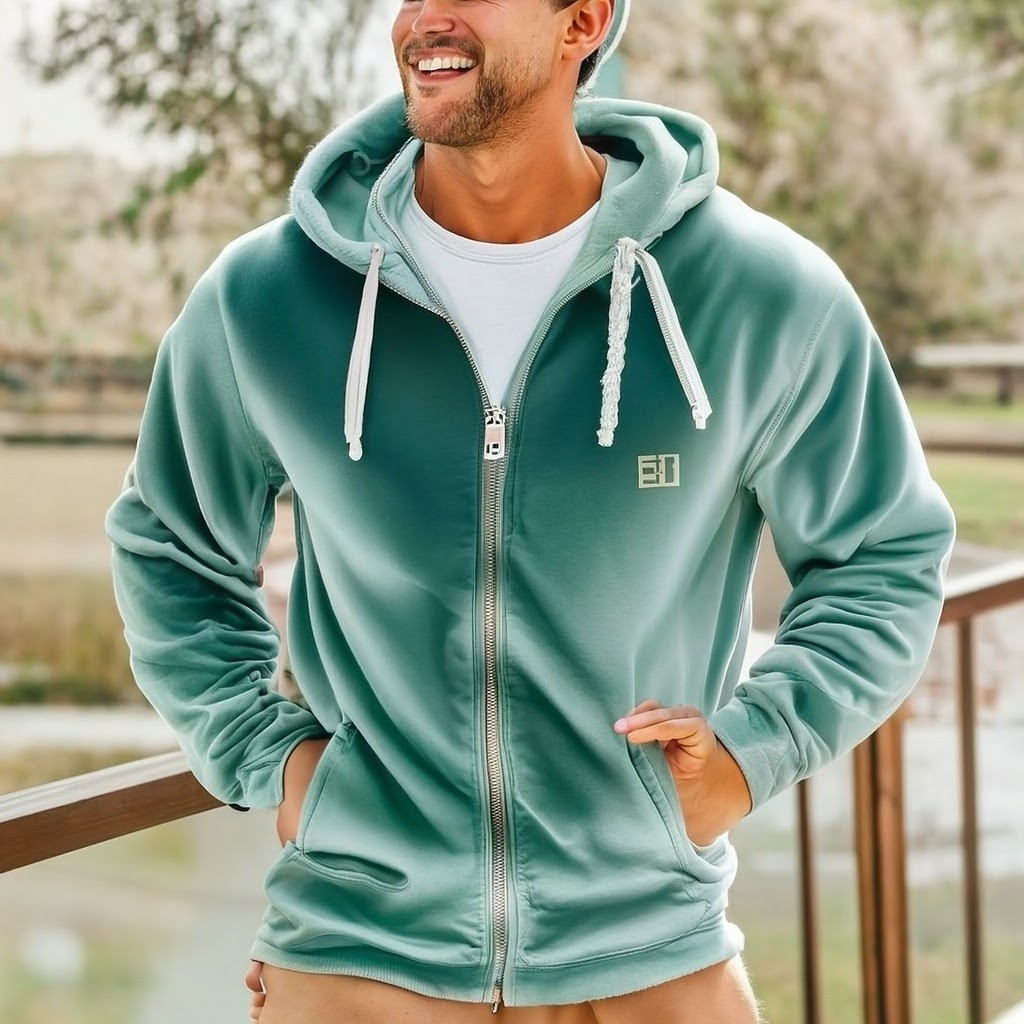

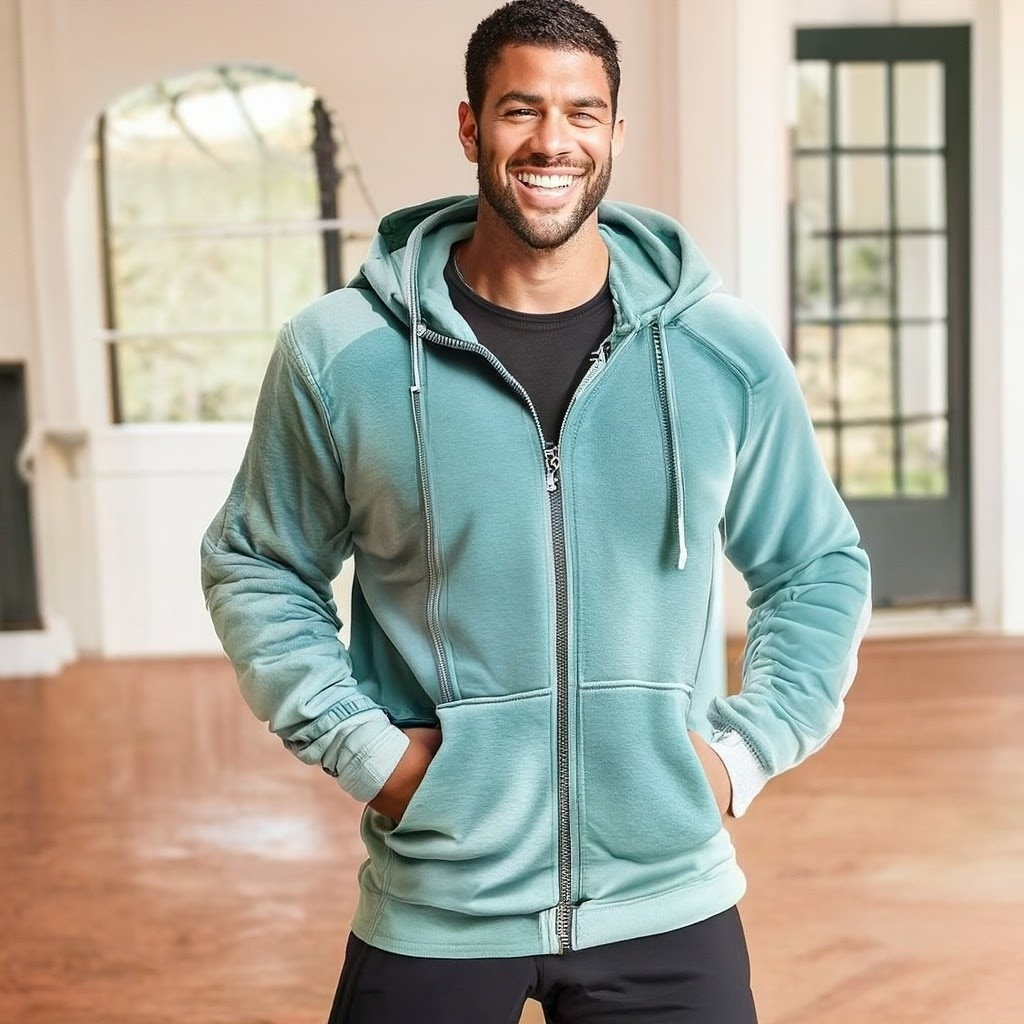

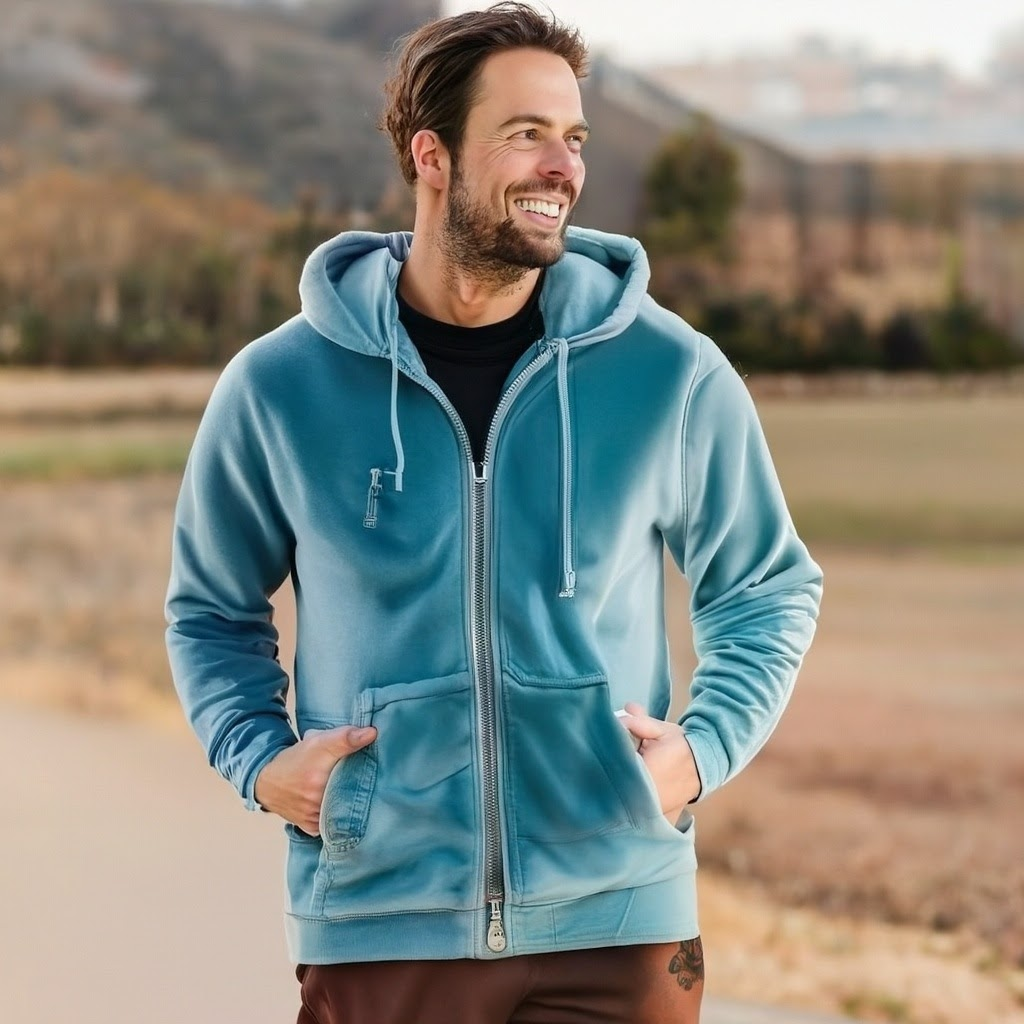

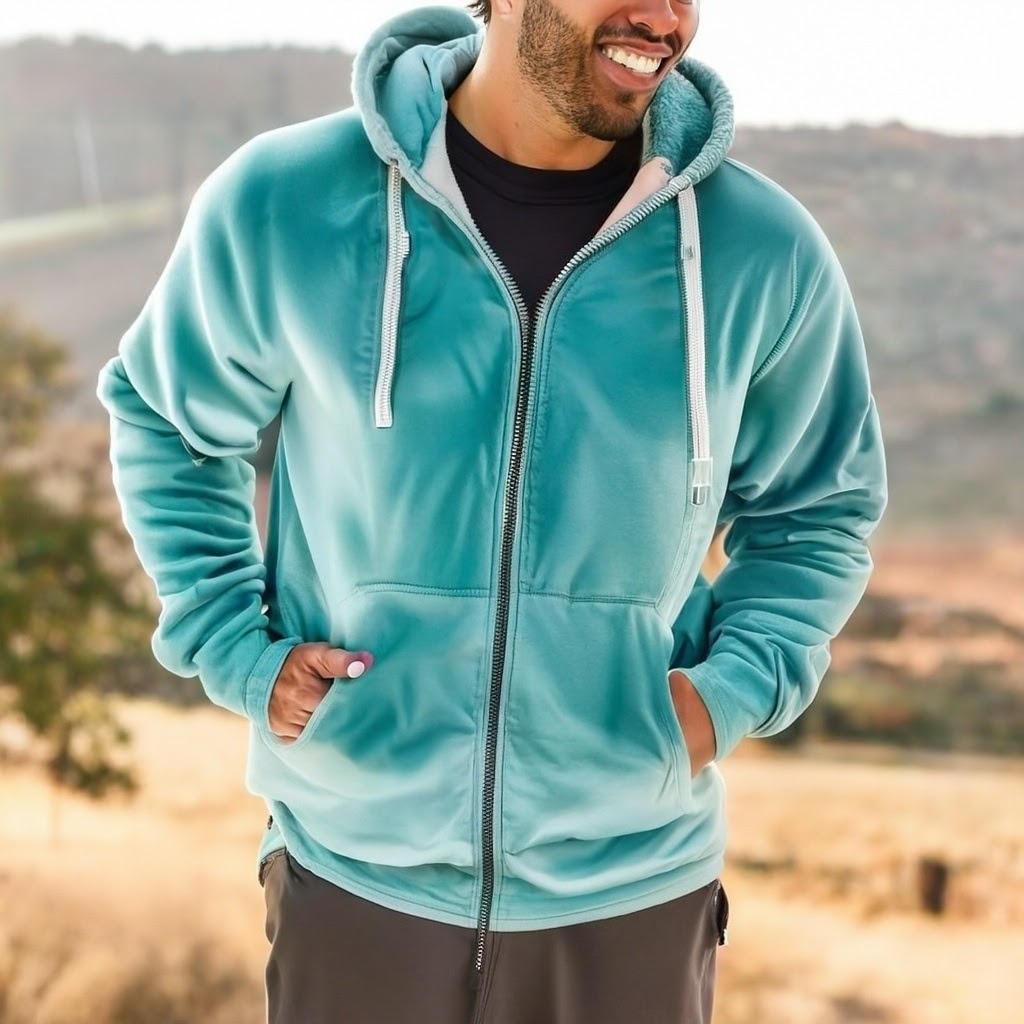


1

2

3



In [38]:
#Generate Image from Prod Description
def generate_images(prompt):
  response = image_gen_model(
    prompt,
    sampleImageSize,
    sampleCount,
    endpointType,
    seed
  )
  json_response = json.loads(response.text)

  try:
    predictions = json_response['predictions']
    return predictions
  except:
    print("An error occured calling the API.")
    print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
    print("2. Try a different prompt to see if that was the problem.\n")
    #print(response.text)

for desc in product_description_dict:
  results = generate_images(product_description_dict[desc])
  #print(results)
  print("name:"+desc+'\n')
  if results:
    display_images(results)

# Generate Social Media Post from Product Description

In [51]:
from vertexai.preview.language_models import TextGenerationModel

def generate_prompt(name):
    """You are a experienced Marketing Manager, designing a promotional campaign"""
    print
    prompt = f"""
      Write an Social Media  post for our product.
      Product Description: {name}.
      Write in a way to inccrease the click through rate of the social media post.
      Create hashtags.
    """
    return prompt

def generate_social_post(prompt, temperature=.2):
   """You are a experienced Marketing Manager, designing a promotional campaign"""
   model = TextGenerationModel.from_pretrained("text-bison-32k")
   response = model.predict(
        prompt,
        temperature=temperature,
        max_output_tokens=256,
        top_k=40,
        top_p=.8,
    )
   print('\n',response.text,'\n\n')
   return response.text

for index, row in prod.iterrows():
  print('\n\n',row['name'])
  prompt = generate_prompt(row['name'])
  response_text = generate_social_post(prompt)



 Independent Trading Co Deluxe Fleece Zip Hoodie

  **Introducing the Independent Trading Co Deluxe Fleece Zip Hoodie, the softest, most comfortable hoodie you'll ever wear.**

This hoodie is made from a premium blend of cotton and polyester fleece, and it features a relaxed fit that's perfect for layering. The full-zip front makes it easy to get on and off, and the kangaroo pocket is perfect for storing your essentials.

Whether you're relaxing at home or running errands, the Independent Trading Co Deluxe Fleece Zip Hoodie is the perfect way to stay warm and cozy. 

**Click here to learn more and order yours today!**

**#IndependentTradingCo #DeluxeFleeceZipHoodie #SoftestHoodieEver #ComfiestHoodieEver #RelaxedFit #FullZipFront #KangarooPocket #StayWarmAndCozy** 


